## Imputation fehlenden Daten im Lebenserwartungsdatensatz

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
df = pd.read_csv('/Users/bhara/Datasets/Lebenserwartung.csv')

In [223]:
pd.set_option('display.max_columns', None)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [224]:
print('Anzahl der Zeilen im Datensatz:',df.shape[0])
print('Anzahl der Spalten im Datensatz:',df.shape[1])

Anzahl der Zeilen im Datensatz: 2938
Anzahl der Spalten im Datensatz: 22


In [225]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [226]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

Vorgehensweise:
1. Datenbereinigung
2. Analyse fehlender Daten
3. Encoden nominaler Attributen
4. Auswahl passender Datenimputationsverfahren
5. Vergleich der Ergebnisse der Imputationsverfahren
6. Auswahl passender Skalierungsverfahren
7. Anpassen linerarer Regression auf dem skalierten Datensatz
8. Analyse der allgemeinen Ergebnisse

### Spaltennamenbereinigung

#### Leerzeichen in Spalten kürzen

In [227]:
print('Spalten des Datensatzes:\n',df.columns.values)

Spalten des Datensatzes:
 ['Country' 'Year' 'Status' 'Life expectancy ' 'Adult Mortality'
 'infant deaths' 'Alcohol' 'percentage expenditure' 'Hepatitis B'
 'Measles ' ' BMI ' 'under-five deaths ' 'Polio' 'Total expenditure'
 'Diphtheria ' ' HIV/AIDS' 'GDP' 'Population' ' thinness  1-19 years'
 ' thinness 5-9 years' 'Income composition of resources' 'Schooling']


In [228]:
# Manche Spalten haben Leerzeichen entweder am Anfang oder am Ende oder an beiden Plätzen des jeweiligen Spaltennamens
# Diese Leerzeichen müssen daher gekürzt werden
for col in df.columns.values:
    col_edit = col.strip()
    df.rename(columns = {col:col_edit}, inplace = True)
    
print('Spalten des Datensatzes nach Bereinigung der Spaltennamen:\n',df.columns.values)

Spalten des Datensatzes nach Bereinigung der Spaltennamen:
 ['Country' 'Year' 'Status' 'Life expectancy' 'Adult Mortality'
 'infant deaths' 'Alcohol' 'percentage expenditure' 'Hepatitis B'
 'Measles' 'BMI' 'under-five deaths' 'Polio' 'Total expenditure'
 'Diphtheria' 'HIV/AIDS' 'GDP' 'Population' 'thinness  1-19 years'
 'thinness 5-9 years' 'Income composition of resources' 'Schooling']


### Analyse fehlender Werte im Datensatz

<Axes: >

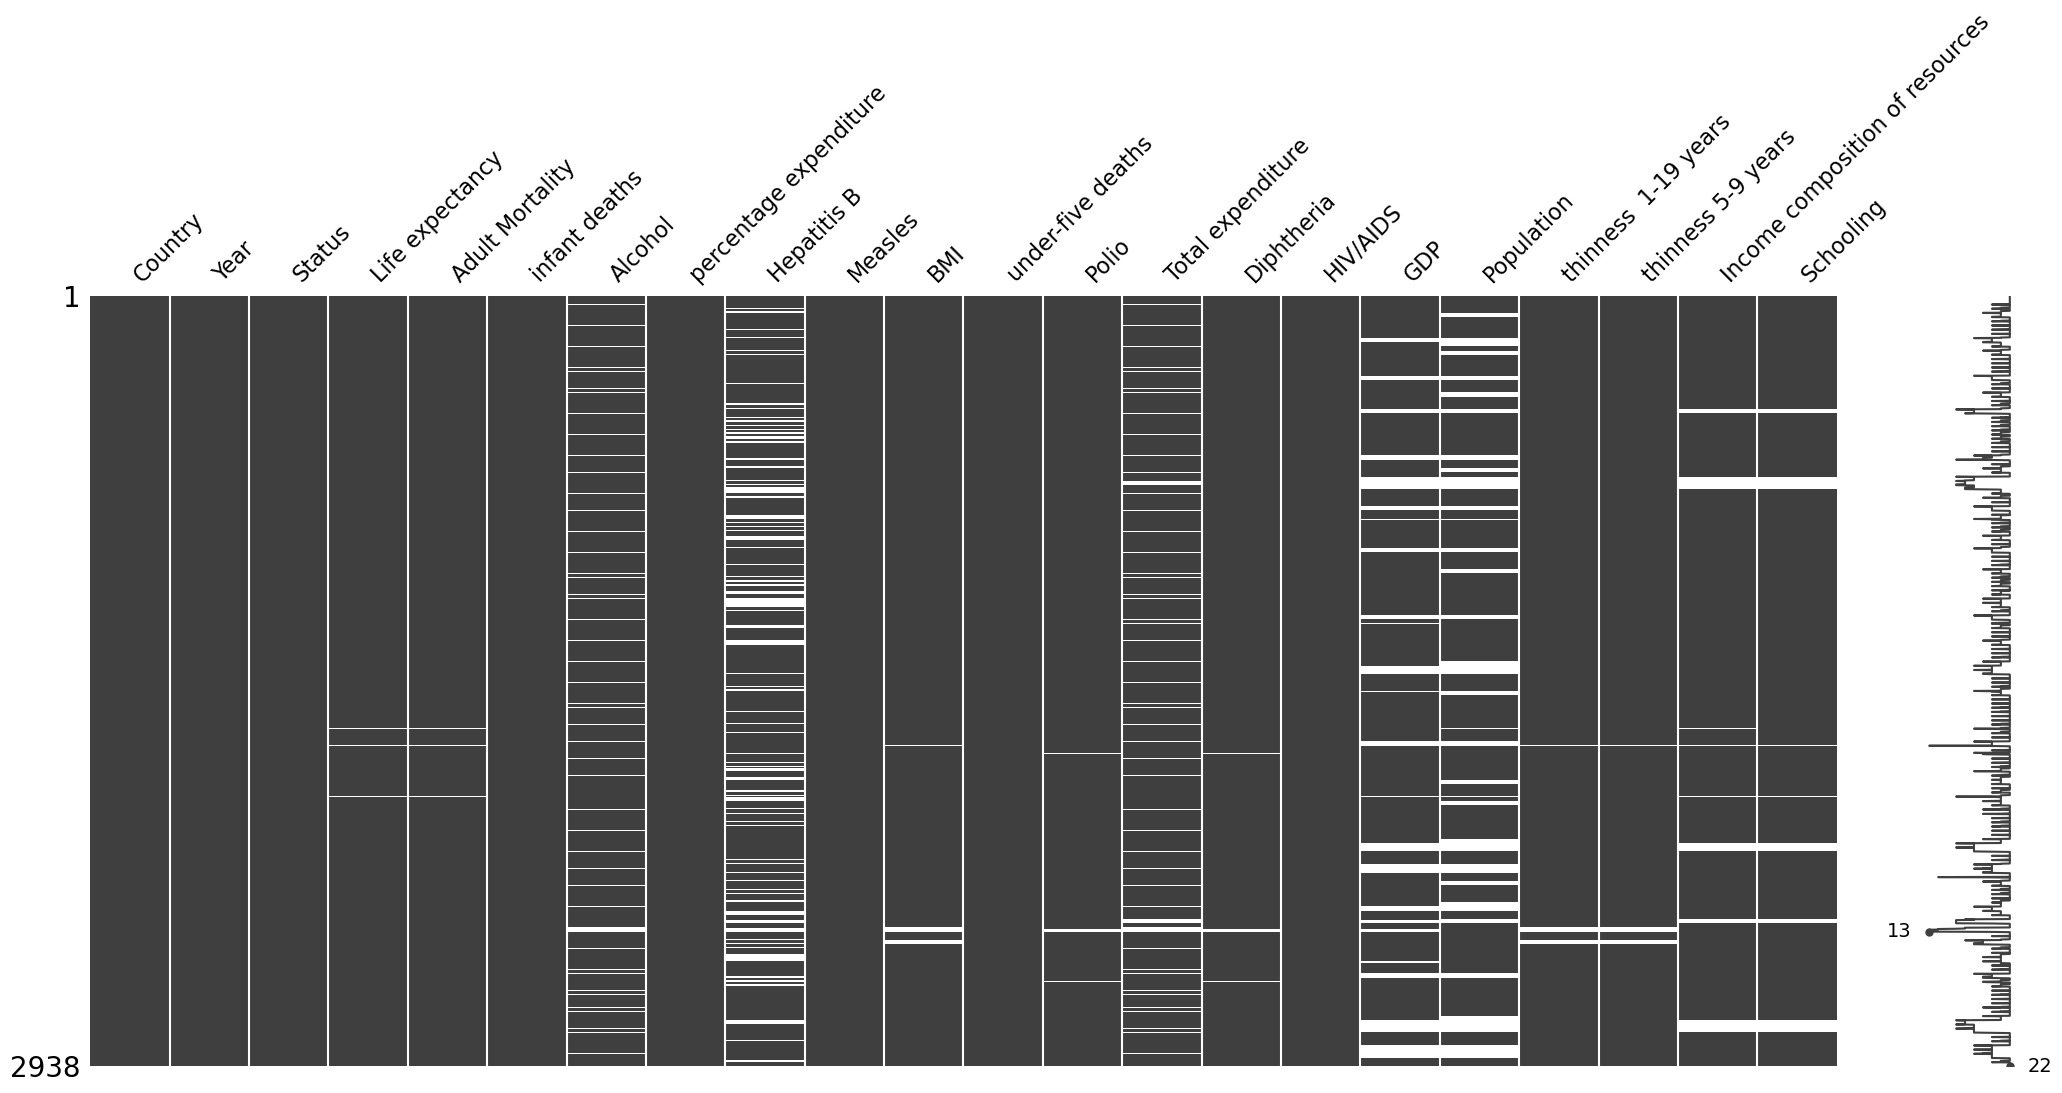

In [229]:
# Visualizierung der null-Werte im Datensatz
import missingno as msno
msno.matrix(df)

In [230]:
print('Prozentsatz der fehlenden Werte im Datensatz:')
(df.isnull().sum()/df.shape[0])*100

Prozentsatz der fehlenden Werte im Datensatz:


Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

1. Die Spalten 'Hepatitis B', 'GDP' und 'Population' haben null-Werte in mehr als 15% der gesamten Zeilen 

2. Die Spalten 'Alcohol', 'Total expenditure', 'Income composition of resources', sowie 'Schooling' haben 
auch wesentlich viele null-Werte (5-8%)

3. Die Spalten 'Life expectancy', 'Adult Mortality', 'BMI', 'Polio', 'Diphtheria', 'thinness  1-19 years', 
sowie 'thinness  5-9 years' haben auch einige null-Werte (0-5%)

### Es bleibt immer noch offen zu bestimmen, welche Art von fehlenden Daten sich im Datensatz befinden.
Es gibt im Prinzip 3 Typen von fehlenden Daten

1. Missing-completely-at-Random (MCAR): Wenn keine mögliche Erklärung für das Fehlen der Daten eines Attributs gefunden 
werden kann.

2. Missing-at-Random (MAR): Wenn das Fehlen der Daten eines Attributs über eine andere Spalte im Datensatz erklärt 
werden kann. (Unglückliche Mitarbeiter teilen kein Feedback in einer Unternehmensfeedbackumfrage mit)

3. Missing-not-at-Random (MNAR): Wenn das Fehlen der Daten eines Attributs über ein anderes, nicht im Datensatz
vorhandenes Attribut mithilfe domänes Wissens erklärt werden kann.

#### Beziehung zw. fehlenden Werten und Entwicklungsstatus

In [231]:
(df[df.Status=='Developed'].isnull().sum()/df.isnull().sum())*100

Country                                  NaN
Year                                     NaN
Status                                   NaN
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                            NaN
Alcohol                            14.432990
percentage expenditure                   NaN
Hepatitis B                        31.283906
Measles                                  NaN
BMI                                 0.000000
under-five deaths                        NaN
Polio                               0.000000
Total expenditure                  14.159292
Diphtheria                          0.000000
HIV/AIDS                                 NaN
GDP                                14.285714
Population                         14.723926
thinness  1-19 years                0.000000
thinness 5-9 years                  0.000000
Income composition of resources    28.742515
Schooling                          29.447853
dtype: flo

In [232]:
(df[df.Status=='Developing'].isnull().sum()/df.isnull().sum())*100

Country                                   NaN
Year                                      NaN
Status                                    NaN
Life expectancy                    100.000000
Adult Mortality                    100.000000
infant deaths                             NaN
Alcohol                             85.567010
percentage expenditure                    NaN
Hepatitis B                         68.716094
Measles                                   NaN
BMI                                100.000000
under-five deaths                         NaN
Polio                              100.000000
Total expenditure                   85.840708
Diphtheria                         100.000000
HIV/AIDS                                  NaN
GDP                                 85.714286
Population                          85.276074
thinness  1-19 years               100.000000
thinness 5-9 years                 100.000000
Income composition of resources     71.257485
Schooling                         

Entwicklungsländer haben fehlende Werte in doppelt so viele Spalten (14) wie die entwickelten Länder (7).
d.h. die Daten der 7 Spalten - 'Life expectancy', 'Adult Mortality', 'BMI', 'Polio', 'Diptheria', 'thinness  1-19 years', 
und 'thinness 5-9 years' fehlen nur, wenn das jeweilige Land ein Entwicklungsland ist.

In [233]:
# Prozentsatz der fehlenden Werte in allen Spalten, wenn 'Hepatitis B'-Werte fehlen
(df[df['Hepatitis B'].isnull()].isnull().sum())/df.isnull().sum() * 100

Country                                   NaN
Year                                      NaN
Status                                    NaN
Life expectancy                      0.000000
Adult Mortality                      0.000000
infant deaths                             NaN
Alcohol                             11.855670
percentage expenditure                    NaN
Hepatitis B                        100.000000
Measles                                   NaN
BMI                                 58.823529
under-five deaths                         NaN
Polio                              100.000000
Total expenditure                   16.371681
Diphtheria                         100.000000
HIV/AIDS                                  NaN
GDP                                 17.187500
Population                          10.889571
thinness  1-19 years                58.823529
thinness 5-9 years                  58.823529
Income composition of resources     26.347305
Schooling                         

Daten der Spalten 'Polio' und 'Diphtheria' fehlen in 100% der Fällen, wenn 'Hepatitis B'-Daten fehlen 

In [234]:
# Prozentsatz der fehlenden Werte in allen Spalten, wenn 'Population'-Werte fehlen
(df[df['Population'].isnull()].isnull().sum())/df.isnull().sum() * 100

Country                                   NaN
Year                                      NaN
Status                                    NaN
Life expectancy                     80.000000
Adult Mortality                     80.000000
infant deaths                             NaN
Alcohol                             19.587629
percentage expenditure                    NaN
Hepatitis B                         12.839060
Measles                                   NaN
BMI                                  5.882353
under-five deaths                         NaN
Polio                                0.000000
Total expenditure                   31.415929
Diphtheria                           0.000000
HIV/AIDS                                  NaN
GDP                                 95.089286
Population                         100.000000
thinness  1-19 years                 5.882353
thinness 5-9 years                   5.882353
Income composition of resources     99.401198
Schooling                         

'Schooling'-Daten fehlen in 100% der Fällen, wenn 'Population'-Daten fehlen
Daten zu 'Income composition of resources' und 'GDP' fehlen auch in 99,4% und 95% Fällen jeweils, 
wenn 'Population'-Daten fehlen

In [235]:
# Prozentsatz der fehlenden Werte in allen Spalten, wenn 'Total expenditure'-Werte fehlen
(df[df['Total expenditure'].isnull()].isnull().sum())/df.isnull().sum() * 100

Country                                   NaN
Year                                      NaN
Status                                    NaN
Life expectancy                      0.000000
Adult Mortality                      0.000000
infant deaths                             NaN
Alcohol                             97.422680
percentage expenditure                    NaN
Hepatitis B                          6.690778
Measles                                   NaN
BMI                                 41.176471
under-five deaths                         NaN
Polio                               57.894737
Total expenditure                  100.000000
Diphtheria                          57.894737
HIV/AIDS                                  NaN
GDP                                 15.178571
Population                          10.889571
thinness  1-19 years                41.176471
thinness 5-9 years                  41.176471
Income composition of resources     23.952096
Schooling                         

Daten zur Spalte 'Alcocol' fehlen in 97% der Fälle, wenn die Daten der Spalte 'Total expenditure' fehlt

Schlussfolgerungen nach Analyse der fehlenden Daten

1. Fehlende Werte in Spalten ''Life expectancy', 'Adult Mortality', 'BMI', 'Polio', 'Diptheria', 'thinness  1-19 years', 
und 'thinness 5-9 years' gehören zur Art 'Zufälliges Fehlen (MAR)' gehören, da das Fehlen der Daten in 100% der Fällen
vom Entwicklungsstatus der jeweiligen Dateninstanz abhängt.

2. Die fehlenden Daten in Spalten 'Hepatitis B', 'GDP', 'Population' sowie 'Total expenditure' fehlen jedoch 
völlig willkürlich und gehören somit zur Art 'Missing-Completely-at-random (MCAR)'.

3. Die Daten in Spalten 'Alcohol', 'Polio', 'Diptheria', 'Schooling' und 'Income composition of resources' fehlen, wenn
Daten solcher Spalten fehlen, die MCAR-Daten enthalten (aus 2.).

Daher weist der Datensatz fehlende Daten zu den Typen - 'MCAR' und 'MAR' auf.
Aus Literaturrecherche werden 9 Verfahren bestimmt, die fehlenden Daten zum Typ MCAR und MAR in einem multivariaten Datensatz gut ersetzen können.

Diese sind nämlich - 1.Forward-Imputation, 2. Backward-Imputation, 3.Mean-Imputation, 4. Median-Imputation 5.KNN-Verfahren, 6.MICE-Imputation, 7. MissForest-Imputation mit SVM als Klassfizierer, 8. Expectation-Maximization Algorithmus, 9. LSTM-Verfahren

In diesem Notebook werden diese Imputationsalgorithmen auf den Datensatz angewandt und deren Evaluationsergebnisse miteinander vergleichen, um die besten Imputationsalgorithmen zu bestimmen.

### Encoden der kategorischen Spalten des Datensatzes

Vor Imputation müssen jedoch Daten der Kategoriespalten encodiert werden, damit der Datensatz nur numerische Attributen enthält,
was wiederum bei der Anwendung von linearer Regression zum Evaluieren der Imputationsverfahren wichtig ist.

#### Encoden nominaler Werte der Spalte 'Country'

In [236]:
df.Country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: Country, Length: 2938, dtype: object

Da Encoding-Verfaren wie Label Encoding nicht ideal zum Encoden von Attributen mit mehreren nominalen Werten ist,
und Verfahren wie One-Hot Encoding und Binary-Encoding die Dimensionalität des Datensatzes stark erhöhen,
wenn die nominale Spalte mehrere einzigartige Werte hat, wurde in diesem Fall entschieden,
Target Encoder, der eine Art vom Category Encoder ist, anzuwenden.

Target Encoder weist der Mean-Wert des Zielattributs über das jeweilige, zu encodende Attribut zu allen Instanzen 
des zu encodenden Attributs auf.

In [237]:
import category_encoders as ce
Encoder = ce.TargetEncoder(cols=['Country'])
df_country_encoded = Encoder.fit_transform(df['Country'], df['Life expectancy'])
df.Country = df_country_encoded.Country

In [238]:
df.Country

0       64.797982
1       64.797982
2       64.797982
3       64.797982
4       64.797982
          ...    
2933    61.705369
2934    61.705369
2935    61.705369
2936    61.705369
2937    61.705369
Name: Country, Length: 2938, dtype: float64

#### Encoden nominaler Werte der Spalte 'Status'

In [239]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [240]:
df['Status'].replace({'Developing':0,'Developed':1}, inplace=True)
df.Status.unique()

array([0, 1], dtype=int64)

###  Imputation fehlender Daten

Imputationverfahren zum Ersetzen fehlender Werte im Datensatz

1. Löschen
2. Forward-Imputation
3. Backward-Imputation
4. Mean-Imputation
5. Median-Imputation
6. KNN-Imputation
7. MICE-Imputation
8. MissForest with SVM Classifier
9. Expectation-Maximization Algorithmus
10. LSTM-Verfahren

('Löschen' wurde auch als ein möglicher Ansatz betrachtet, obwohl der Anteil der fehlenden Daten im Datensatz zu hoch ist, damit die Endergebnisse miteinander verglichen werden können.)

In [308]:
df_löschen = df.copy()
df_forward = df.copy()
df_backward = df.copy()
df_mean = df.copy()
df_median = df.copy()
df_knn = df.copy()
df_mice = df.copy()
df_missforest = df.copy()
df_em = df.copy()
df_lstm = df.copy()

### 1. Löschen

In [242]:
df_löschen.dropna(axis=0,inplace=True)
df_löschen.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [243]:
print('Größe des Datensatzes vor dem Löschen fehlender Daten: ', df.shape)
print('Größe des Datensatzes nach dem Löschen fehlender Daten: ',df_löschen.shape)

Größe des Datensatzes vor dem Löschen fehlender Daten:  (2938, 22)
Größe des Datensatzes nach dem Löschen fehlender Daten:  (1649, 22)


Beim Entfernen der Null-Werte im Datensatz ist die Anzahl der Zeilen im Datensatz von 2938 auf 1649 reduziert 
(~43% der gestamen Daten) - Kein ideales Verfahren zum Aufbauen des ML-Modells auf den Datensatz, 
da das Modell viele wesentliche Muster im Datensatz vernachlässigen würde.

In [244]:
# Anpassung linearer Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [245]:
x_löschen = df_löschen.drop('Life expectancy',axis=1)
y_löschen = df_löschen['Life expectancy']
y_löschen = pd.DataFrame(y_löschen)

In [246]:
x_löschen_train, x_löschen_test, y_löschen_train, y_löschen_test =  train_test_split(x_löschen,y_löschen,test_size=.30)

In [247]:
print("X_train: ",x_löschen_train.shape)
print("X_test: ",x_löschen_test.shape)
print("y_train: ",y_löschen_train.shape)
print("y_test: ",y_löschen_test.shape)

X_train:  (1154, 21)
X_test:  (495, 21)
y_train:  (1154, 1)
y_test:  (495, 1)


In [248]:
linreg = LinearRegression()
linreg.fit(x_löschen_train,y_löschen_train)

LinearRegression()

In [249]:
y_löschen_pred = linreg.predict(x_löschen_test)

In [250]:
# Evaluationsmetriken von linearer Regression
mse_löschen = mean_squared_error(y_löschen_test,y_löschen_pred) # MSE-Wert
rmse_löschen = sqrt(mse_löschen) # RMSE-Wert
r2_löschen = r2_score(y_löschen_test, y_löschen_pred) # R2-Score
n_löschen = x_löschen_test.shape[0]  # number of samples
k_löschen = x_löschen_test.shape[1]  # number of features
r2_adj_löschen = 1 - ((1 - r2_löschen) * (n_löschen - 1) / (n_löschen - k_löschen - 1)) # Angepasster R2-score

LinReg_löschen = pd.DataFrame({'Evalutionsmetriken': ['Mean-squared-error (MSE)','Root-mean-sqaured-error (RMSE)','R2-score','Angepasster R2-Score'],
                               'Scores': [mse_löschen, rmse_löschen, r2_löschen, r2_adj_löschen]})
print('Evaluationsergebnisse von linearer Regression nach Löschen fehlender Daten:\n')
LinReg_löschen

Evaluationsergebnisse von linearer Regression nach Löschen fehlender Daten:



,Evalutionsmetriken,Scores
0,Mean-squared-error (MSE),3.477944
1,Root-mean-sqaured-error (RMSE),1.864925
2,R2-score,0.951601
3,Angepasster R2-Score,0.949453


### 2. Forward-Imputation

In [251]:
df_forward = df_forward.ffill()
df_forward.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [252]:
x_forward = df_forward.drop('Life expectancy',axis=1)
y_forward = df_forward['Life expectancy']
y_forward = pd.DataFrame(y_forward)

In [253]:
x_forward_train, x_forward_test, y_forward_train, y_forward_test =  train_test_split(x_forward,y_forward,test_size=.30)

In [254]:
print("X_train: ",x_forward_train.shape)
print("X_test: ",x_forward_test.shape)
print("y_train: ",y_forward_train.shape)
print("y_test: ",y_forward_test.shape)

X_train:  (2056, 21)
X_test:  (882, 21)
y_train:  (2056, 1)
y_test:  (882, 1)


In [255]:
linreg_forward = LinearRegression()
linreg_forward.fit(x_forward_train,y_forward_train)

LinearRegression()

In [256]:
y_forward_pred = linreg_forward.predict(x_forward_test)

In [257]:
mse_forward = mean_squared_error(y_forward_test,y_forward_pred)
rmse_forward = sqrt(mse_forward)
r2_forward = r2_score(y_forward_test, y_forward_pred)
n_forward = x_forward_test.shape[0]  # number of samples
k_forward = x_forward_test.shape[1]  # number of features
r2_adj_forward = 1 - ((1 - r2_forward) * (n_forward - 1) / (n_forward - k_forward - 1))

LinReg_forward = pd.DataFrame({'Evalutionsmetriken': ['Mean-squared-error (MSE)','Root-mean-sqaured-error (RMSE)','R2-score','Angepasster R2-Score'],
                               'Scores': [mse_forward, rmse_forward, r2_forward, r2_adj_forward]})
print('Evaluationsergebnisse von linearer Regression nach Forward-Imputation:\n')
LinReg_forward

Evaluationsergebnisse von linearer Regression nach Forward-Imputation:



,Evalutionsmetriken,Scores
0,Mean-squared-error (MSE),3.546261
1,Root-mean-sqaured-error (RMSE),1.883152
2,R2-score,0.960014
3,Angepasster R2-Score,0.959037


### 3. Backward-Imputation

In [258]:
df_backward = df_backward.ffill()
df_backward.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [259]:
x_backward = df_backward.drop('Life expectancy',axis=1)
y_backward = df_backward['Life expectancy']
y_backward = pd.DataFrame(y_forward)

In [260]:
x_backward_train, x_backward_test, y_backward_train, y_backward_test =  train_test_split(x_backward,y_backward,test_size=.30)

In [261]:
print("X_train: ",x_backward_train.shape)
print("X_test: ",x_backward_test.shape)
print("y_train: ",y_backward_train.shape)
print("y_test: ",y_backward_test.shape)

X_train:  (2056, 21)
X_test:  (882, 21)
y_train:  (2056, 1)
y_test:  (882, 1)


In [262]:
linreg_backward = LinearRegression()
linreg_backward.fit(x_backward_train,y_backward_train)

LinearRegression()

In [263]:
y_backward_pred = linreg_backward.predict(x_backward_test)

In [264]:
mse_backward = mean_squared_error(y_backward_test,y_backward_pred)
rmse_backward = sqrt(mse_backward)
r2_backward = r2_score(y_backward_test, y_backward_pred)
n_backward = x_backward_test.shape[0]  # number of samples
k_backward = x_backward_test.shape[1]  # number of features
r2_adj_backward = 1 - ((1 - r2_backward) * (n_backward - 1) / (n_backward - k_backward - 1))

In [265]:
LinReg_backward = pd.DataFrame({'Evalutionsmetriken': ['Mean-squared-error (MSE)','Root-mean-sqaured-error (RMSE)','R2-score','Angepasster R2-Score'],
                               'Scores': [mse_backward, rmse_backward, r2_backward, r2_adj_backward]})
print('Evaluationsergebnisse von linearer Regression nach Backward-Imputation:\n')
LinReg_backward

Evaluationsergebnisse von linearer Regression nach Backward-Imputation:



,Evalutionsmetriken,Scores
0,Mean-squared-error (MSE),4.318151
1,Root-mean-sqaured-error (RMSE),2.078016
2,R2-score,0.952291
3,Angepasster R2-Score,0.951126


### 4. Mean-Imputation

In [266]:
for col in df_mean.columns:
        df_mean[col].fillna(df_mean[col].mean(),inplace=True)

In [267]:
df_mean.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [268]:
x_mean = df_mean.drop('Life expectancy',axis=1)
y_mean = df_mean['Life expectancy']
y_mean = pd.DataFrame(y_mean)

In [269]:
x_mean_train, x_mean_test, y_mean_train, y_mean_test =  train_test_split(x_mean,y_mean,test_size=.30)

In [270]:
print("X_train: ",x_mean_train.shape)
print("X_test: ",x_mean_test.shape)
print("y_train: ",y_mean_train.shape)
print("y_test: ",y_mean_test.shape)

X_train:  (2056, 21)
X_test:  (882, 21)
y_train:  (2056, 1)
y_test:  (882, 1)


In [271]:
linreg_mean = LinearRegression()
linreg_mean.fit(x_mean_train,y_mean_train)

LinearRegression()

In [272]:
y_mean_pred = linreg.predict(x_mean_test)

In [273]:
mse_mean = mean_squared_error(y_mean_test,y_mean_pred)
rmse_mean = sqrt(mse_mean)
r2_mean = r2_score(y_mean_test, y_mean_pred)
n_mean = x_mean_test.shape[0]  # number of samples
k_mean = x_mean_test.shape[1]  # number of features
r2_adj_mean = 1 - ((1 - r2_mean) * (n_mean - 1) / (n_mean - k_mean - 1))

LinReg_mean = pd.DataFrame({'Evalutionsmetriken': ['Mean-squared-error (MSE)','Root-mean-sqaured-error (RMSE)','R2-score','Angepasster R2-Score'],
                               'Scores': [mse_mean, rmse_mean, r2_mean, r2_adj_mean]})
print('Evaluationsergebnisse von linearer Regression nach Mean-Imputation:\n')
LinReg_mean

Evaluationsergebnisse von linearer Regression nach Mean-Imputation:



,Evalutionsmetriken,Scores
0,Mean-squared-error (MSE),3.819892
1,Root-mean-sqaured-error (RMSE),1.954454
2,R2-score,0.961368
3,Angepasster R2-Score,0.960424


### 5. Median Imputation

In [274]:
for col in df_median.columns:
        df_median[col].fillna(df_median[col].median(),inplace=True)

In [275]:
df_median.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [276]:
x_median = df_median.drop('Life expectancy',axis=1)
y_median = df_median['Life expectancy']
y_median = pd.DataFrame(y_median)

In [277]:
x_median_train, x_median_test, y_median_train, y_median_test =  train_test_split(x_median,y_median,test_size=.30)

In [278]:
print("X_train: ",x_median_train.shape)
print("X_test: ",x_median_test.shape)
print("y_train: ",y_median_train.shape)
print("y_test: ",y_median_test.shape)

X_train:  (2056, 21)
X_test:  (882, 21)
y_train:  (2056, 1)
y_test:  (882, 1)


In [279]:
linreg_median = LinearRegression()
linreg_median.fit(x_median_train,y_median_train)

LinearRegression()

In [280]:
y_median_pred = linreg.predict(x_median_test)

In [281]:
mse_median = mean_squared_error(y_median_test,y_median_pred)
rmse_median = sqrt(mse_median)
r2_median = r2_score(y_median_test, y_median_pred)
n_median = x_median_test.shape[0]  # number of samples
k_median = x_median_test.shape[1]  # number of features
r2_adj_median = 1 - ((1 - r2_median) * (n_median - 1) / (n_median - k_median - 1))

In [282]:
LinReg_median = pd.DataFrame({'Evalutionsmetriken': ['Mean-squared-error (MSE)','Root-mean-sqaured-error (RMSE)','R2-score','Angepasster R2-Score'],
                               'Scores': [mse_median, rmse_median, r2_median, r2_adj_median]})
print('Evaluationsergebnisse von linearer Regression nach Median-Imputation:\n')
LinReg_median

Evaluationsergebnisse von linearer Regression nach Median-Imputation:



,Evalutionsmetriken,Scores
0,Mean-squared-error (MSE),3.682943
1,Root-mean-sqaured-error (RMSE),1.919100
2,R2-score,0.958909
3,Angepasster R2-Score,0.957906


### 6. KNN-Imputer (K-Nearest-Neighbours)

In [284]:
from sklearn.impute import KNNImputer

In [285]:
imputer = KNNImputer(n_neighbors=2) # Da der Datensatz klein ist, wäre die Hyperparameterauswahl k zw. 1 und 3 ideal
df_filled = imputer.fit_transform(df_knn)

In [286]:
df_knn_imputed = pd.DataFrame(df_filled, columns=df_knn.columns)

In [287]:
df_knn_imputed.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,64.797982,2015.0,0.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,64.797982,2014.0,0.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,64.797982,2013.0,0.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,64.797982,2012.0,0.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,64.797982,2011.0,0.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [288]:
df_knn_imputed.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [289]:
x_knn = df_knn_imputed.drop('Life expectancy', axis=1)
y_knn = df_knn_imputed['Life expectancy']
y_knn = pd.DataFrame(y_knn)

In [290]:
x_knn_train, x_knn_test, y_knn_train, y_knn_test =  train_test_split(x_knn,y_knn,test_size=.30)

In [291]:
print("X_train: ",x_knn_train.shape)
print("X_test: ",x_knn_test.shape)
print("y_train: ",y_knn_train.shape)
print("y_test: ",y_knn_test.shape)

X_train:  (2056, 21)
X_test:  (882, 21)
y_train:  (2056, 1)
y_test:  (882, 1)


In [292]:
linreg_knn = LinearRegression()
linreg_knn.fit(x_knn_train,y_knn_train)

LinearRegression()

In [293]:
y_knn_pred = linreg_knn.predict(x_knn_test)

In [294]:
y_knn_pred = linreg_knn.predict(x_knn_test)
mse_knn = mean_squared_error(y_knn_test,y_knn_pred)
rmse_knn = sqrt(mse_knn)
r2_knn = r2_score(y_knn_test, y_knn_pred)
n_knn = x_knn_test.shape[0]  # number of samples
k_knn = x_knn_test.shape[1]  # number of features
r2_adj_knn = 1 - ((1 - r2_knn) * (n_knn - 1) / (n_knn - k_knn - 1))

LinReg_knn = pd.DataFrame({'Evalutionsmetriken': ['Mean-squared-error (MSE)','Root-mean-sqaured-error (RMSE)','R2-score','Angepasster R2-Score'],
                               'Scores': [mse_knn, rmse_knn, r2_knn, r2_adj_knn]})
print('Evaluationsergebnisse von linearer Regression nach KNN-Imputation:\n')
LinReg_knn

Evaluationsergebnisse von linearer Regression nach KNN-Imputation:



,Evalutionsmetriken,Scores
0,Mean-squared-error (MSE),4.216228
1,Root-mean-sqaured-error (RMSE),2.053346
2,R2-score,0.950944
3,Angepasster R2-Score,0.949746


### 7. (Multivariate Imputation by Chained Equations) MICE-Imputation

MICE-Imputation, auch als iteratives Imputationsverfahren benannt, betrachtet das Attribut mit den fehlenden Daten
als das Zielattribut und imputiert die fehlenden Werte mithilfe deren Beziehungen zwischen anderen Attributen.

In [295]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [296]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [297]:
df_mice_imputed = imputer.fit_transform(df_mice)

In [298]:
df_mice_imputed = pd.DataFrame(df_mice_imputed,columns=df_mice.columns)

In [299]:
df_mice_imputed.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [300]:
x_mice = df_mice_imputed.drop('Life expectancy',axis=1)
y_mice = df_mice_imputed['Life expectancy']
y_mice = pd.DataFrame(y_mice)

In [301]:
x_mice_train, x_mice_test, y_mice_train, y_mice_test = train_test_split(x_mice, y_mice, test_size=0.30)

In [302]:
print("X_train: ",x_mean_train.shape)
print("X_test: ",x_mean_test.shape)
print("y_train: ",y_mean_train.shape)
print("y_test: ",y_mean_test.shape)

X_train:  (2056, 21)
X_test:  (882, 21)
y_train:  (2056, 1)
y_test:  (882, 1)


In [303]:
linreg_mice = LinearRegression()
linreg_mice.fit(x_mice_train,y_mice_train)

LinearRegression()

In [304]:
y_mice_pred = linreg_mice.predict(x_mice_test)

In [305]:
mse_mice = mean_squared_error(y_mice_test,y_mice_pred)
rmse_mice = sqrt(mse_mice)
r2_mice = r2_score(y_mice_test, y_mice_pred)
n_mice = x_mice_test.shape[0]  # number of samples
k_mice = x_mice_test.shape[1]  # number of features
r2_adj_mice = 1 - ((1 - r2_mice) * (n_mice - 1) / (n_mice - k_mice - 1))


LinReg_mice = pd.DataFrame({'Evalutionsmetriken': ['Mean-squared-error (MSE)','Root-mean-sqaured-error (RMSE)','R2-score','Angepasster R2-Score'],
                               'Scores': [mse_mice, rmse_mice, r2_mice, r2_adj_mice]})
print('Evaluationsergebnisse von linearer Regression nach MICE-Imputation:\n')
LinReg_mice

Evaluationsergebnisse von linearer Regression nach MICE-Imputation:



,Evalutionsmetriken,Scores
0,Mean-squared-error (MSE),3.675073
1,Root-mean-sqaured-error (RMSE),1.917048
2,R2-score,0.959091
3,Angepasster R2-Score,0.958092


#### Dir Algorithmen (8) MissForest mit SVM Klassifizierer, (9) Expectation Maximization-Algorithmus, und (10) LSTM-Verfahren müssen immer noch implementiert werden.

## Vergleich der Evaluationsergebnisse

In [306]:
Imputationsergebnis_mse = pd.DataFrame({'Imputationsverfahren': ['Löschen','Forward-Imputation','Backward-Imputation','Mean-Imputation','Median-Imputation','KNN-Imputation','MICE-Imputation'],
                               'Mean-squared-error(MSE)': [mse_löschen,mse_forward,mse_backward,mse_mean,mse_median,mse_knn,mse_mice]})
print('Mean-squared-error (MSE):','\n')
print(Imputationsergebnis_mse,'\n')
Imputationsergebnis_rmse = pd.DataFrame({'Imputationsverfahren': ['Löschen','Forward-Imputation','Backward-Imputation','Mean-Imputation','Median-Imputation','KNN-Imputation','MICE-Imputation'],
                               'Root-mean-squared-error (RMSE)': [rmse_löschen,rmse_forward,rmse_backward,rmse_mean,rmse_median,rmse_knn,rmse_mice]})
print('Root-mean-squared-error (RMSE):','\n')
print(Imputationsergebnis_rmse,'\n')
Imputationsergebnis_r2 = pd.DataFrame({'Imputationsverfahren': ['Löschen','Forward-Imputation','Backward-Imputation','Mean-Imputation','Median-Imputation','KNN-Imputation','MICE-Imputation'],
                               'R2-Scores': [r2_löschen,r2_forward,r2_backward,r2_mean,r2_median,r2_knn,r2_mice]})
print('R2-Score:','\n')
print(Imputationsergebnis_r2,'\n')
Imputationsergebnis_r2_adj = pd.DataFrame({'Imputationsverfahren': ['Löschen','Forward-Imputation','Backward-Imputation','Mean-Imputation','Median-Imputation','KNN-Imputation','MICE-Imputation'],
                               'Angepasster R2-Scores': [r2_adj_löschen,r2_adj_forward,r2_adj_backward,r2_adj_mean,r2_adj_median,r2_adj_knn,r2_adj_mice]})
print('Adjustierter R2-Score:','\n')
print(Imputationsergebnis_r2_adj,'\n')

Mean-squared-error (MSE): 

  Imputationsverfahren  Mean-squared-error(MSE)
0              Löschen                 3.477944
1   Forward-Imputation                 3.546261
2  Backward-Imputation                 4.318151
3      Mean-Imputation                 3.819892
4    Median-Imputation                 3.682943
5       KNN-Imputation                 4.216228
6      MICE-Imputation                 3.675073 

Root-mean-squared-error (RMSE): 

  Imputationsverfahren  Root-mean-squared-error (RMSE)
0              Löschen                        1.864925
1   Forward-Imputation                        1.883152
2  Backward-Imputation                        2.078016
3      Mean-Imputation                        1.954454
4    Median-Imputation                        1.919100
5       KNN-Imputation                        2.053346
6      MICE-Imputation                        1.917048 

R2-Score: 

  Imputationsverfahren  R2-Scores
0              Löschen   0.951601
1   Forward-Imputation   0.960